In [115]:
%matplotlib inline

import geofield
import dipole
import scipy
from matplotlib import pyplot, rcParams
rcParams.update({'font.family': "Source Sans Pro"})
rcParams.update({'font.size': 18})

In [69]:
import importlib
importlib.reload(dipole); importlib.reload(geofield)

<module 'geofield' from '/home/josecper/Programs/python/geofield.py'>

In [20]:
gcomp=geofield.ChaosData("../data/CHAOS5X/gauss_coeff_chaos5x.dat").gcomp[0,1:]

In [17]:
dipole.power(gcomp,1), dipole.power(gcomp,2)

(910313951.82046819, 23219345.026857015)

In [24]:
x,y,z=dipole.ecc_dipole(gcomp)

In [28]:
s,z,phi=dipole.xyz2cyl(x,y,z)

In [29]:
s

496.9873142110668

In [30]:
z

234.84319069952653

In [32]:
scipy.rad2deg(phi)

143.90180204591323

In [70]:
sha=geofield.SHADIFData("../data/sha.dif.14k/coeff_SHA.DIF.14k.dat")

__Single iteration__

In [71]:
x,y,z=dipole.ecc_dipole(sha.gcomp)

In [79]:
s,z,phi=dipole.xyz2cyl(x,y,z)
r=scipy.sqrt(x**2+y**2+z**2)

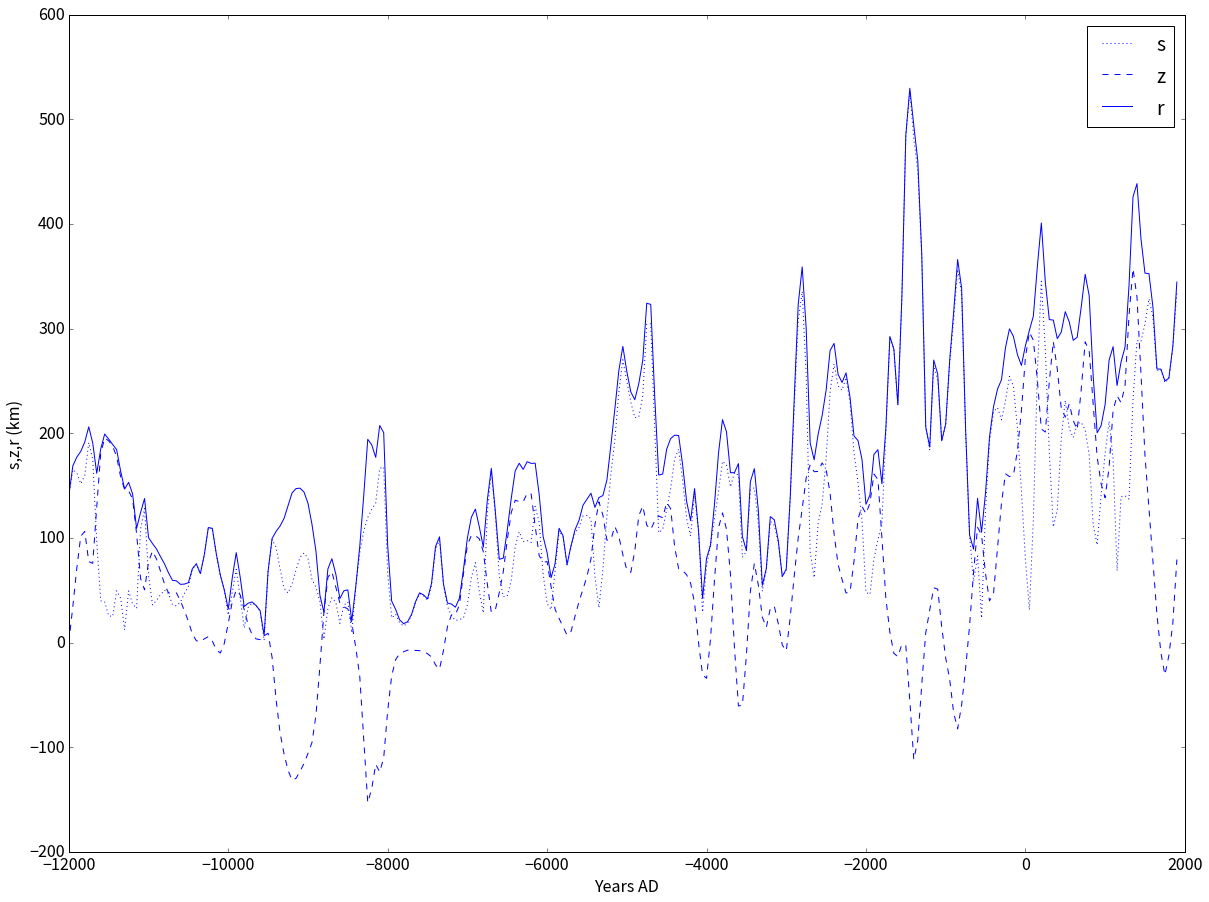

In [118]:
fig, ax = pyplot.subplots(figsize=(20,15))

ax.plot(sha.years, s, "b:", label="s")
ax.plot(sha.years, z, "b--", label="z")
ax.plot(sha.years, r, "b-", label="r")

ax.set_xlabel("Years AD")
ax.set_ylabel("s,z,r (km)")
ax.legend()

pyplot.show(fig)

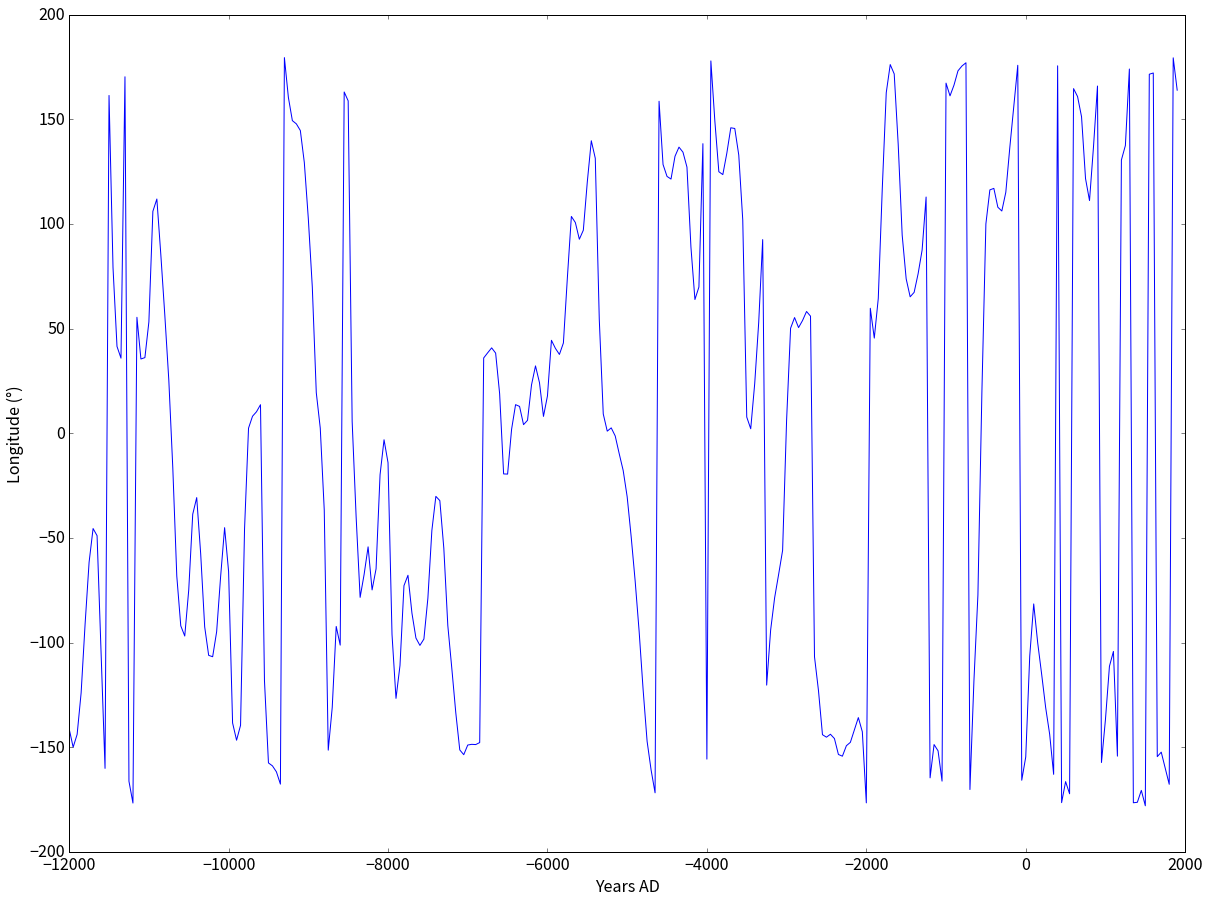

In [119]:
fig, ax = pyplot.subplots(figsize=(20,15))

ax.plot(sha.years, scipy.rad2deg(phi), "b-")

ax.set_xlabel("Years AD")
ax.set_ylabel("Longitude (°)")

pyplot.show(fig)

__Bootstrap method__

In [ ]:
iterations = 1000

xs = numpy.zeros((iterations,len(sha.years)))
ys = xs.copy()
zs = xs.copy()

gshort = sha.gcomp[..., :8]
gshort_err = sha.gcomp_err[..., :8] #doesn't exist yet

for i in range(iterations):
    gi = ghsort+numpy.random.randn(gshort.shape)*gshort_err
    
    xs[i,:], ys[i,:], zs[i,:] = dipole.ecc_dipole(gi)
    
x = sum(xs, axis=1)
y = sum(ys, axis=1)
z = sum(zs, axis=1)

#stdev